#Unsupervised Learning

**Marta Fernández González, Alberto González Delgado**

We are going to cluster neurons on the basis of eight morphological features of their axons. Each neuron constains a single axon. An axon can be seen as a tree-like structure formed by bifurcating branches.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import NearestCentroid
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from skimage import io
from IPython import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

## Importing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/neurons.csv')
#df = pd.read_csv('/content/drive/MyDrive/neurons.csv')

df.iloc[0:5]

,length.avg,N_bifurcations,partition_asymmetry.avg,width,height,remote_bifurcation_angle.avg,tortuosity.avg,centrifugal_order.avg
0,43.728934,263,0.526221,520.050018,357.480023,70.332944,0.902529,7.741445
1,51.946525,630,0.513065,553.110001,836.100007,70.018588,0.869234,10.603175
2,74.673060,261,0.560458,833.339996,1087.050018,80.251142,0.822710,10.268199
3,29.215082,226,0.550626,564.239990,317.380004,79.252038,0.886938,9.557522
4,47.408962,329,0.511908,460.589997,615.540024,71.070944,0.874683,8.668693


The features of the data is:

a) lengt.av: branch length averaged over the branches of the axon.

b) N_bifurcations: total number of bifurcations .

c) partition_asymmetry.avg: A measure of branching assymetry. Averaged over the branches of the
axon.

d) width: Total axonal width (in µm).

e) height: Total axonal width (in µm).

f) remote_bifurcation_angle.avg: Branch bifurcation amplitude. Averaged over the branches of the
axon.

g) tortuosity.avg: Ratio of the branch length and Euclidean distance between its endpoints. Averaged
over the branches of the axon.

h) centrifugal_order.avg: The number of bifurcations from the root (soma) to a branch. Averaged over
the branches of the axon.

## Basic Exploratory Data Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length.avg,219.0,49.300881,17.232865,15.232903,37.332829,45.984482,57.703749,127.942960
N_bifurcations,219.0,314.744292,181.518565,33.000000,189.500000,289.000000,401.000000,1455.000000
partition_asymmetry.avg,219.0,0.574903,0.060077,0.425082,0.537238,0.573900,0.610853,0.794875
width,219.0,731.105891,371.159743,131.500004,473.234997,672.760009,882.834992,2561.330078
height,219.0,896.947354,391.390199,246.430000,611.050004,833.550034,1178.184953,2218.000000
remote_bifurcation_angle.avg,219.0,77.136299,7.323456,52.851915,71.584180,77.332885,82.364417,93.030575
tortuosity.avg,219.0,0.848490,0.034481,0.748402,0.826514,0.850163,0.872782,0.924208
centrifugal_order.avg,219.0,9.846865,2.712823,4.340426,8.220150,9.436066,10.718970,25.034050


In [ ]:
df.columns

Index(['length.avg', 'N_bifurcations', 'partition_asymmetry.avg', 'width',
       'height', 'remote_bifurcation_angle.avg', 'tortuosity.avg',
       'centrifugal_order.avg'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   length.avg                    219 non-null    float64
 1   N_bifurcations                219 non-null    int64  
 2   partition_asymmetry.avg       219 non-null    float64
 3   width                         219 non-null    float64
 4   height                        219 non-null    float64
 5   remote_bifurcation_angle.avg  219 non-null    float64
 6   tortuosity.avg                219 non-null    float64
 7   centrifugal_order.avg         219 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 13.8 KB


There are not nulle values in any column (219 reads non-null). 
Several methods don not work with null values, so it is an important aspect to have into account. If would have been some null value, they would have been eliminated.

In [ ]:
df.duplicated().sum()

0

(array([ 2.,  6., 19., 40., 49., 43., 23., 10., 11.,  5.,  4.,  2.,  0.,
         2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 4.34042553,  5.37510676,  6.409788  ,  7.44446923,  8.47915046,
         9.51383169, 10.54851293, 11.58319416, 12.61787539, 13.65255662,
        14.68723786, 15.72191909, 16.75660032, 17.79128155, 18.82596279,
        19.86064402, 20.89532525, 21.93000648, 22.96468771, 23.99936895,
        25.03405018]),
 <a list of 20 Patch objects>)

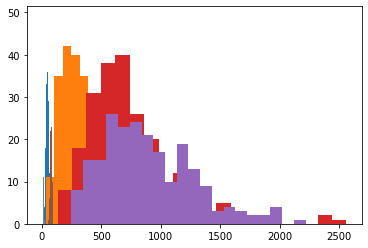

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['length.avg'], bins = 20)
plt.hist(df['N_bifurcations'], bins = 20)
plt.hist(df['partition_asymmetry.avg'], bins = 20)
plt.hist(df['width'], bins = 20)
plt.hist(df['height'], bins = 20)
plt.hist(df['remote_bifurcation_angle.avg'], bins = 20)
plt.hist(df['tortuosity.avg'], bins = 20)
plt.hist(df['centrifugal_order.avg'], bins = 20)

The data has not duplicated values. In addition, all the kind of values seems to be consistents and there are neither duplicated columns. Due to this, there is not reason for cleaning the data.

The next plot shows the correlation between the values of each feature and the distribution of data from each feature.


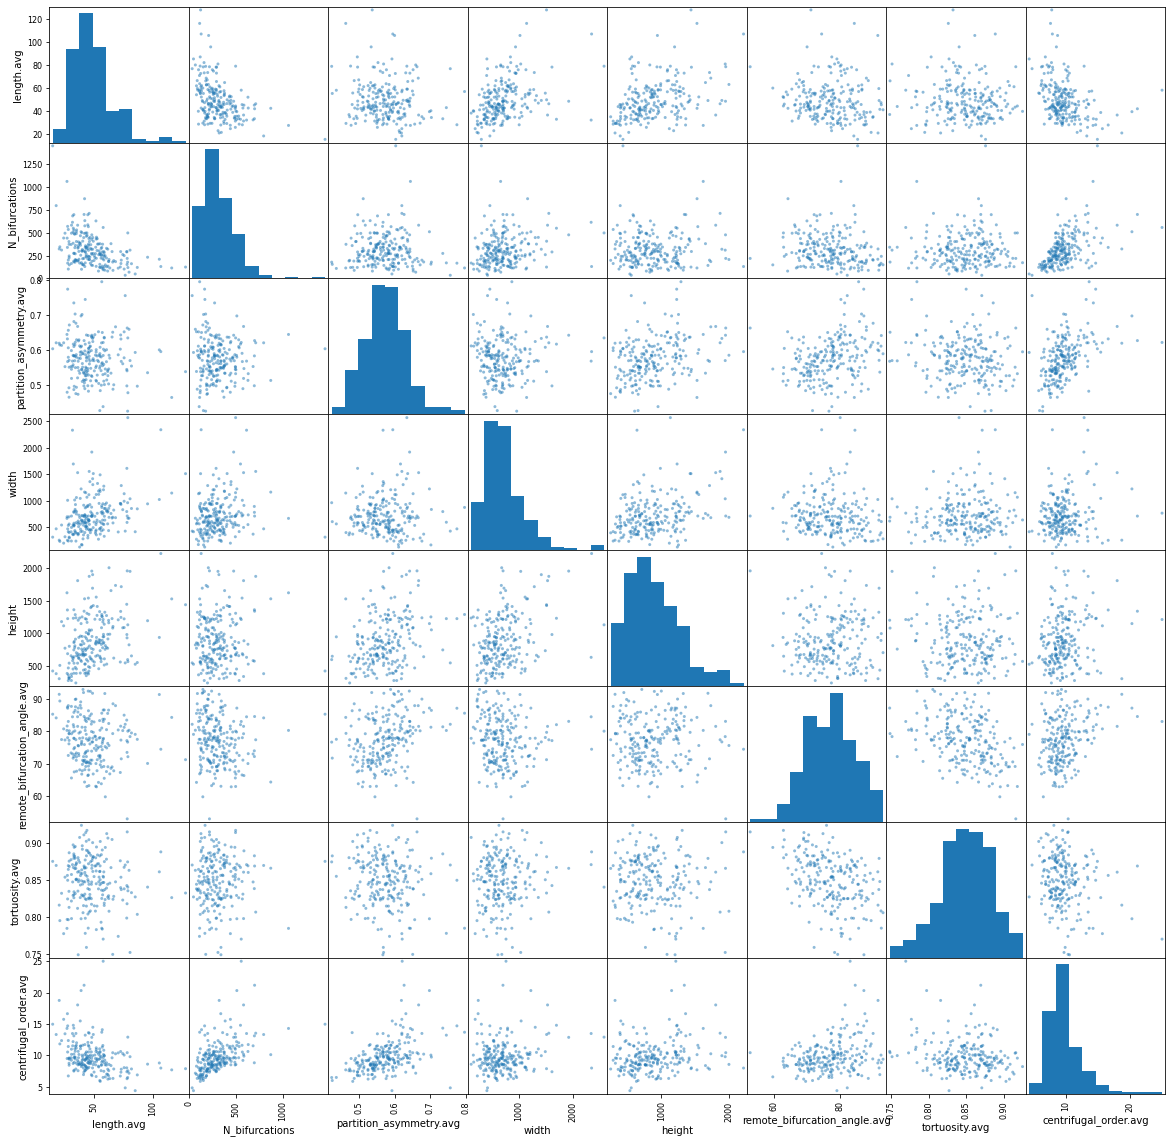

In [ ]:
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.show()

Notice that there is no clear separation between variable scatterplots.

## Preprocessing
The data seems that it has different scala, so we are going to standarize them. We usually want to standardize, so that all variables have the same
weight when comparing data points. 



In [ ]:
scaler = preprocessing.StandardScaler().fit(df)
X_scaled = scaler.transform(df)
df_s = pd.DataFrame(X_scaled, columns = ['length.avg', 'N_bifurcations', 'partition_asymmetry.avg', 'width',
       'height', 'remote_bifurcation_angle.avg', 'tortuosity.avg',
       'centrifugal_order.avg'])

df_s.iloc[0:5]


,length.avg,N_bifurcations,partition_asymmetry.avg,width,height,remote_bifurcation_angle.avg,tortuosity.avg,centrifugal_order.avg
0,-0.324073,-0.285716,-0.812182,-0.569942,-1.381494,-0.931110,1.570803,-0.777877
1,0.153875,1.740747,-1.031670,-0.480665,-0.155821,-0.974133,0.602997,0.279429
2,1.475686,-0.296760,-0.240989,0.276076,0.486824,0.426299,-0.749393,0.155668
3,-1.168222,-0.490019,-0.405026,-0.450610,-1.484184,0.289561,1.117597,-0.106902
4,-0.110037,0.078716,-1.050975,-0.730509,-0.720642,-0.830107,0.761381,-0.435292


(array([ 2.,  6., 19., 40., 49., 43., 23., 10., 11.,  5.,  4.,  2.,  0.,
         2.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([-2.03443192, -1.65215428, -1.26987663, -0.88759899, -0.50532135,
        -0.1230437 ,  0.25923394,  0.64151158,  1.02378922,  1.40606687,
         1.78834451,  2.17062215,  2.55289979,  2.93517744,  3.31745508,
         3.69973272,  4.08201036,  4.46428801,  4.84656565,  5.22884329,
         5.61112093]),
 <a list of 20 Patch objects>)

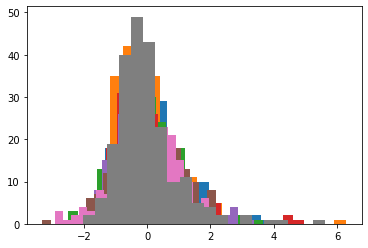

In [ ]:
plt.hist(df_s['length.avg'], bins = 20)
plt.hist(df_s['N_bifurcations'], bins = 20)
plt.hist(df_s['partition_asymmetry.avg'], bins = 20)
plt.hist(df_s['width'], bins = 20)
plt.hist(df_s['height'], bins = 20)
plt.hist(df_s['remote_bifurcation_angle.avg'], bins = 20)
plt.hist(df_s['tortuosity.avg'], bins = 20)
plt.hist(df_s['centrifugal_order.avg'], bins = 20)

It can be seen that now, the data has the same scale

##k-means Clustering

In [ ]:
from sklearn.cluster import KMeans

X = np.array(df_s[['length.avg', 'N_bifurcations', 'partition_asymmetry.avg', 'width',
       'height', 'remote_bifurcation_angle.avg', 'tortuosity.avg',
       'centrifugal_order.avg']])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

We have plotted several situations in order to visualize how the data looks like with different number of clusters 

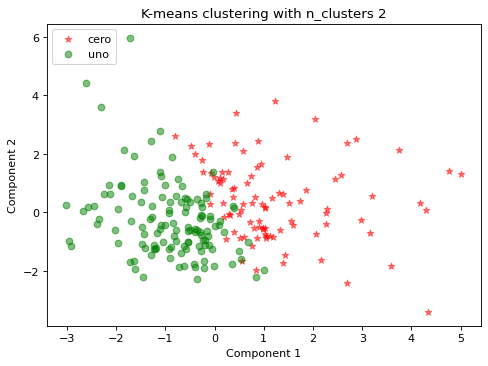

In [ ]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# Predicting the clusters
pred_cluster = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
clases = ['cero','uno']
marcas = ['*', 'o']
color = ['red', 'green']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(Xp[pred_cluster==i, 0], Xp[pred_cluster==i, 1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])

plt.title("K-means clustering with n_clusters 2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='upper left')
plt.show()

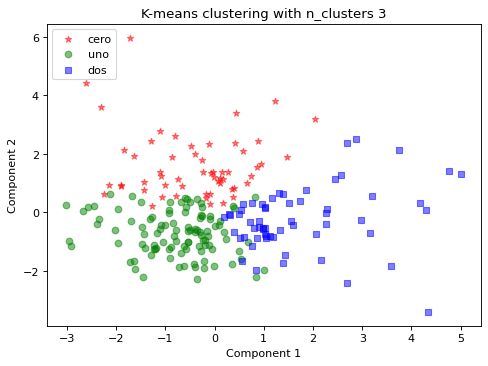

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# Predicting the clusters
pred_cluster = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_


import matplotlib.pyplot as plt
clases = ['cero','uno', 'dos']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(Xp[pred_cluster==i, 0], Xp[pred_cluster==i, 1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.title("K-means clustering with n_clusters 3")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='upper left')
plt.show()


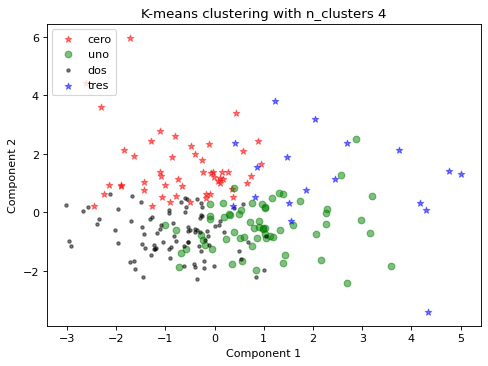

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
# Predicting the clusters
pred_cluster = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
clases = ['cero','uno','dos','tres']
marcas = ['*', 'o','.','*']
color = ['red', 'green','black','blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(Xp[pred_cluster==i, 0], Xp[pred_cluster==i, 1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.title("K-means clustering with n_clusters 4")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='upper left')
plt.show()

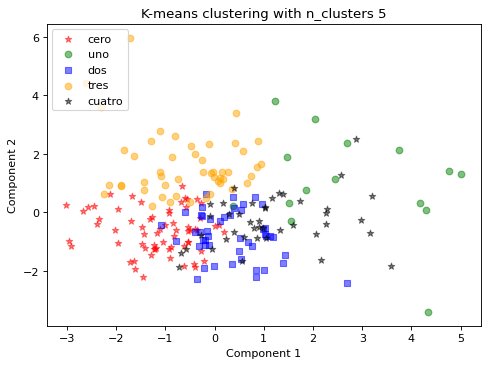

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
# Predicting the clusters
pred_cluster = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

import matplotlib.pyplot as plt
clases = ['cero','uno', 'dos', 'tres', 'cuatro']
marcas = ['*', 'o', 's', 'o', '*']
color = ['red', 'green', 'blue', 'orange', 'black']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(Xp[pred_cluster==i, 0], Xp[pred_cluster==i, 1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.title("K-means clustering with n_clusters 5")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(loc='upper left')
plt.show()


###Determining the number of clusters

####1. SSE
Sum of squared error is a helpful metric to fuide the choice of the best number of groups to use in clustering. A more market segments are created, the SSE improves, generally. 

We should to select the number of segments after the graphic suffers a big improvement in minimizing SSE but then the level of improvement starts to decrease.

In [ ]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
p = figure(width=500, plot_height=300)
p.line(range(1,11), distortions, line_color="navy", line_width=3, line_alpha=0.6, legend_label="SSE vs k")
p.legend.location='top_left'
p.legend.click_policy="hide"
p.xaxis.axis_label = 'Number of Clusters'
p.yaxis.axis_label = 'SSE'

show(p)

####2.BIC
Bayesian Information Criterion (BIC) is a criterion for model selection among a finite set of model. Models with lower BIC are generally preferred.

In [ ]:
from sklearn.mixture import GaussianMixture
bic = []
for i in range(1, 50):
    gmm = GaussianMixture(n_components=i, init_params='kmeans')
    gmm.fit(X)
    bic.append(gmm.bic(X))
p = figure(width=500, plot_height=300)
p.line(range(1,50), bic, line_color="navy", line_width=3, line_alpha=0.6, legend_label="BIC vs k")
p.legend.location='top_left'
p.legend.click_policy="hide"
p.xaxis.axis_label = 'Number of Clusters'
p.yaxis.axis_label = 'BIC'

show(p)

####3. Silhouette score
sklearn.metrics.silhouette_score returns the mean Silhouette Coefficient over all samples. The best value is 1 and the worst value is -1. Values near to 0 indicate overlapping clusters. Negative alues indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
score = silhouette_score(X, km.labels_, metric='euclidean')

Text(0, 0.5, 'silhouette score')

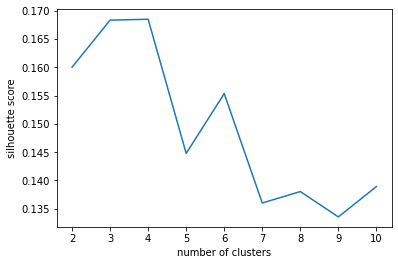

In [ ]:
#Source https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

k_values=[]
silhouette=[]
for i in range(2,11):
  # Instantiate the KMeans models
  km = KMeans(n_clusters=i, random_state=42)
  # Fit the KMeans model
  km.fit_predict(X)
  # Calculate Silhoutte Score
  score = silhouette_score(X, km.labels_, metric='euclidean')
  # Print the score
  k_values.append(i)
  silhouette.append(score)

plt.plot(k_values, silhouette)
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")

Here we plot the Silhouette score of each cluster in our data partiotioning, using 3 clusters

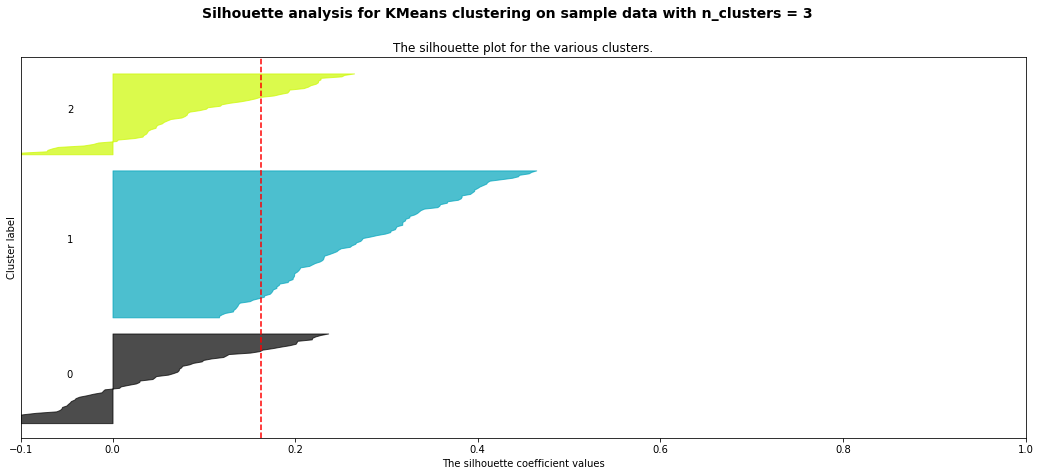

In [ ]:
#Adapted from : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In SSE vs k plot the improvement decreases while k changes from 2 to 3 and while k changes from 4 to 5. On the other hand, the lower BIC obtained is also for k=2. However, for k=4 BIC value can be also acceptable. In addition, the silhouette score for k=4 is one of the best values. Nevertheless, for k=2 the silhouette score is similar.

So, based in this criteria, we would say that the best k-means clustering is using four and two clusters. 

##Hierarchical clustering

In [ ]:
# Adapted from https://gist.github.com/bitsnaps/12415200fc62539fff852a1b46168d0a

def clustering(df1, link_method):
    X = df1.iloc[:].values
    range_n_clusters = [2,3,4,5,6,7,8,9,10]
    silhouette_values = {}
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=link_method)
        y_predict = clusterer.fit_predict(X)
        cluster_labels = clusterer.labels_

        clf = NearestCentroid()
        clf.fit(X, y_predict)


        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > 0.0:
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)
            silhouette_values[n_clusters] = silhouette_avg

            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
    optimal_nbr_clusters = max(silhouette_values, key=silhouette_values.get)
    print("Best Nbr of Clusters = %d, according to silhouette score: %.2f" % (optimal_nbr_clusters, silhouette_values[optimal_nbr_clusters]))

    return

Wards linkage method

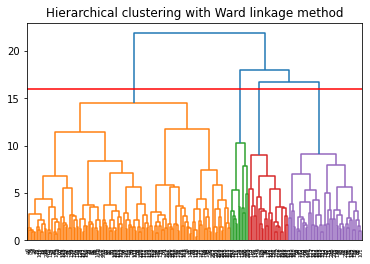

In [ ]:
linkage_data = linkage(df_s, method='ward')
dendrogram(linkage_data)
plt.axhline(y = 16, color = 'r', linestyle = '-')
plt.title("Hierarchical clustering with Ward linkage method")
plt.show()

In [ ]:
clustering(df_s, 'ward')

For n_clusters = 2 The average silhouette_score is : 0.1644424013586101
For n_clusters = 3 The average silhouette_score is : 0.16375577301038519
For n_clusters = 4 The average silhouette_score is : 0.15473306092032965
For n_clusters = 5 The average silhouette_score is : 0.12253088458355836
For n_clusters = 6 The average silhouette_score is : 0.10995930073950978
For n_clusters = 7 The average silhouette_score is : 0.10663858740089006
For n_clusters = 8 The average silhouette_score is : 0.11387740139140966
For n_clusters = 9 The average silhouette_score is : 0.11587875098687264
For n_clusters = 10 The average silhouette_score is : 0.12020118017670796
Best Nbr of Clusters = 2, according to silhouette score: 0.16


After locating the horizontal line, we count how many times our vertical lines were crossed by it - in this example, 4 times. So 5 seems a good indication of the number of clusters that have the most distance between them. On the other hand, when we check with the silouette score, the best number of cluster is 2 or 3.

Text(0, 0.5, 'Component 2')

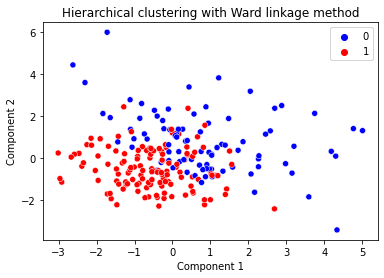

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                palette=['blue', 'red']).set_title("Hierarchical clustering with Ward linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

Text(0, 0.5, 'Component 2')

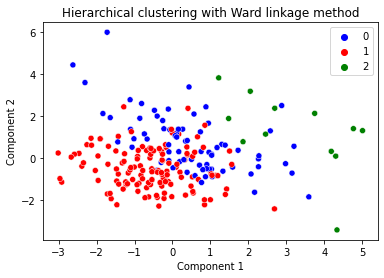

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                palette=['blue', 'red', 'green']).set_title("Hierarchical clustering with Ward linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

Single linkage method

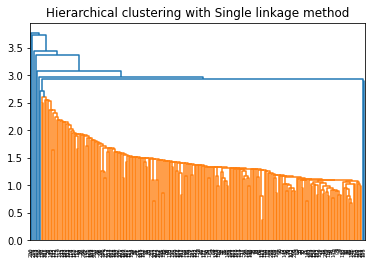

In [ ]:
linkage_data = linkage(df_s, method='single')
dendrogram(linkage_data)
plt.title('Hierarchical clustering with Single linkage method')
plt.show()

In [ ]:
clustering(df_s, 'single')

For n_clusters = 2 The average silhouette_score is : 0.4647597621984425
For n_clusters = 3 The average silhouette_score is : 0.42751167804700096
For n_clusters = 4 The average silhouette_score is : 0.3490614119926519
For n_clusters = 5 The average silhouette_score is : 0.33084833751316745
For n_clusters = 6 The average silhouette_score is : 0.2853635415718768
For n_clusters = 7 The average silhouette_score is : 0.2667425920737725
For n_clusters = 8 The average silhouette_score is : 0.2751664276544948
For n_clusters = 9 The average silhouette_score is : 0.2649354213381763
For n_clusters = 10 The average silhouette_score is : 0.22249467355771732
Best Nbr of Clusters = 2, according to silhouette score: 0.46


Text(0, 0.5, 'Component 2')

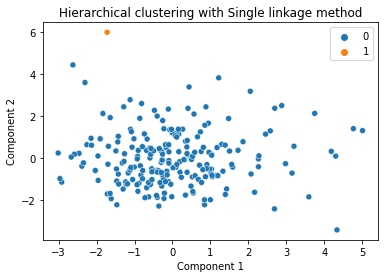

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage='single')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                ).set_title("Hierarchical clustering with Single linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

Complete linkage method

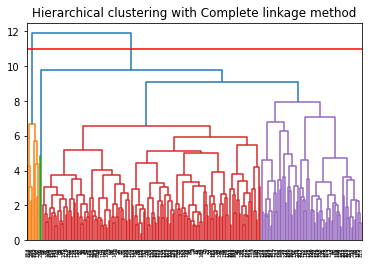

In [ ]:
linkage_data = linkage(df_s, method='complete')
dendrogram(linkage_data)
plt.axhline(y = 11, color = 'r', linestyle = '-')
plt.title('Hierarchical clustering with Complete linkage method')
plt.show()

In [ ]:
clustering(df_s, 'complete')

For n_clusters = 2 The average silhouette_score is : 0.29468506941710326
For n_clusters = 3 The average silhouette_score is : 0.28878941650475376
For n_clusters = 4 The average silhouette_score is : 0.1327463064955543
For n_clusters = 5 The average silhouette_score is : 0.12691361055169292
For n_clusters = 6 The average silhouette_score is : 0.0930455341325931
For n_clusters = 7 The average silhouette_score is : 0.0736373999093253
For n_clusters = 8 The average silhouette_score is : 0.07683546290924648
For n_clusters = 9 The average silhouette_score is : 0.092667604556865
For n_clusters = 10 The average silhouette_score is : 0.09696562451202755
Best Nbr of Clusters = 2, according to silhouette score: 0.29


Text(0, 0.5, 'Component 2')

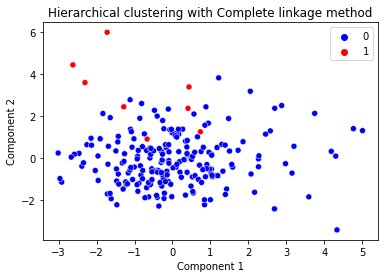

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage='complete')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                palette=['blue', 'red']).set_title("Hierarchical clustering with Complete linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

Average linkage method

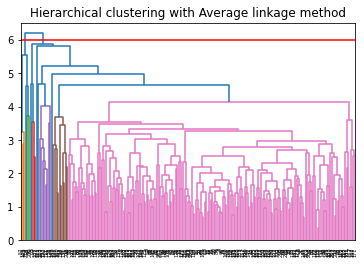

In [ ]:
linkage_data = linkage(df_s, method='average')
dendrogram(linkage_data)
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.title('Hierarchical clustering with Average linkage method')
plt.show()

In [ ]:
clustering(df_s, 'average')

For n_clusters = 2 The average silhouette_score is : 0.40357656407412157
For n_clusters = 3 The average silhouette_score is : 0.3352981901083414
For n_clusters = 4 The average silhouette_score is : 0.30204894651982855
For n_clusters = 5 The average silhouette_score is : 0.2871606238554774
For n_clusters = 6 The average silhouette_score is : 0.28876887847086524
For n_clusters = 7 The average silhouette_score is : 0.2392440567749088
For n_clusters = 8 The average silhouette_score is : 0.22630535359808626
For n_clusters = 9 The average silhouette_score is : 0.18395346685119313
For n_clusters = 10 The average silhouette_score is : 0.17565412015896198
Best Nbr of Clusters = 2, according to silhouette score: 0.40


Text(0, 0.5, 'Component 2')

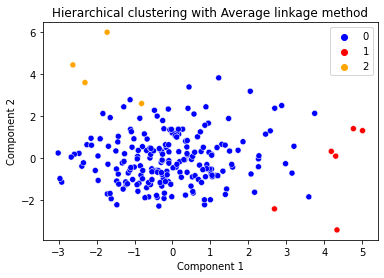

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage='average')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                palette=['blue', 'red', 'orange']).set_title("Hierarchical clustering with Average linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

Text(0, 0.5, 'Component 2')

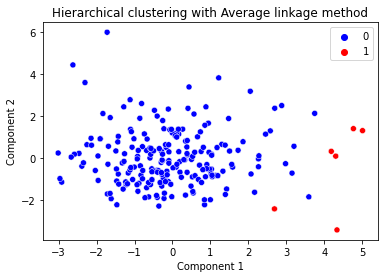

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage='average')
clustering_model.fit(X)
data_labels = clustering_model.labels_
sns.scatterplot(x=Xp[:, 0], 
                y=Xp[:, 1], 
                data=df_s, 
                hue=data_labels,
                palette=['blue', 'red']).set_title("Hierarchical clustering with Average linkage method")

plt.xlabel('Component 1')
plt.ylabel('Component 2')

As the best approach is 3 clusters for Ward's linkage method, let's plot the silouette score for each cluster

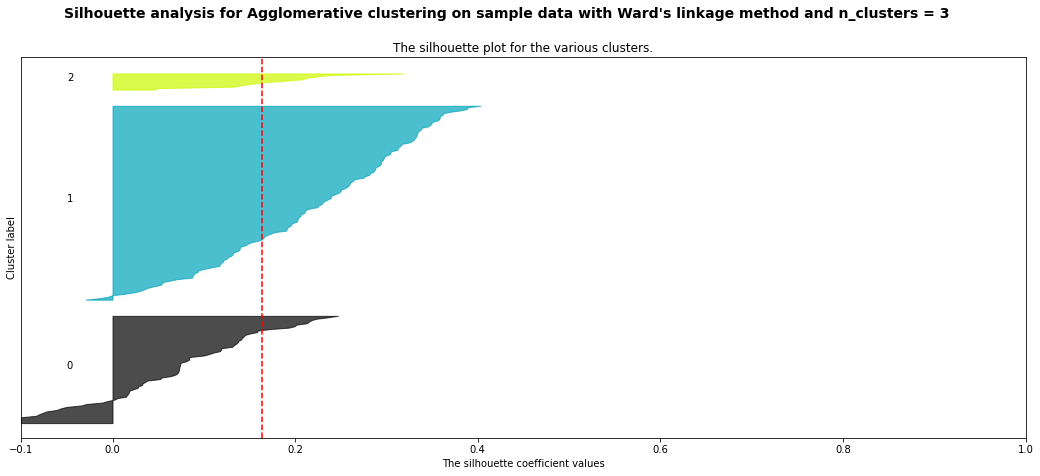

In [ ]:
#Adapted from : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=3, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for Agglomerative clustering on sample data with Ward's linkage method and n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()